In [5]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
import matplotlib.pyplot as plt
from utils import constants as cnst
import pandas as pd
import glob
import cartopy
import cartopy.crs as ccrs
from utils import u_grid, u_interpolate as u_int, u_darrays as uda

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [7]:
da = glob.glob('/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/*/*/*/*.nc')

In [8]:
da

['/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_1800.nc',
 '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_1815.nc',
 '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_1830.nc',
 '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_1845.nc',
 '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_1900.nc',
 '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_1915.nc',
 '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_1930.nc',
 '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_1945.nc',
 '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/03/31/IR_108_BT_20200331_2000.nc',
 '/media/ck/Element

In [9]:
minlist = []

In [10]:
for d in da: 
    try:
        minlist.append(xr.open_dataset(d, decode_times=False)['IR108_BT'].min())
    except:
        continue

In [11]:
np.min(minlist)

-98.70243835449219

In [12]:
da2 = glob.glob('/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/*.nc')

In [13]:
minlist2 = []

In [14]:
for d in da2: 
    try:
        minlist2.append(xr.open_dataset(d, decode_times=False)['tir'].min())
    except:
        continue

In [73]:
np.min(minlist2)

-10500

In [74]:
len(minlist2)

312

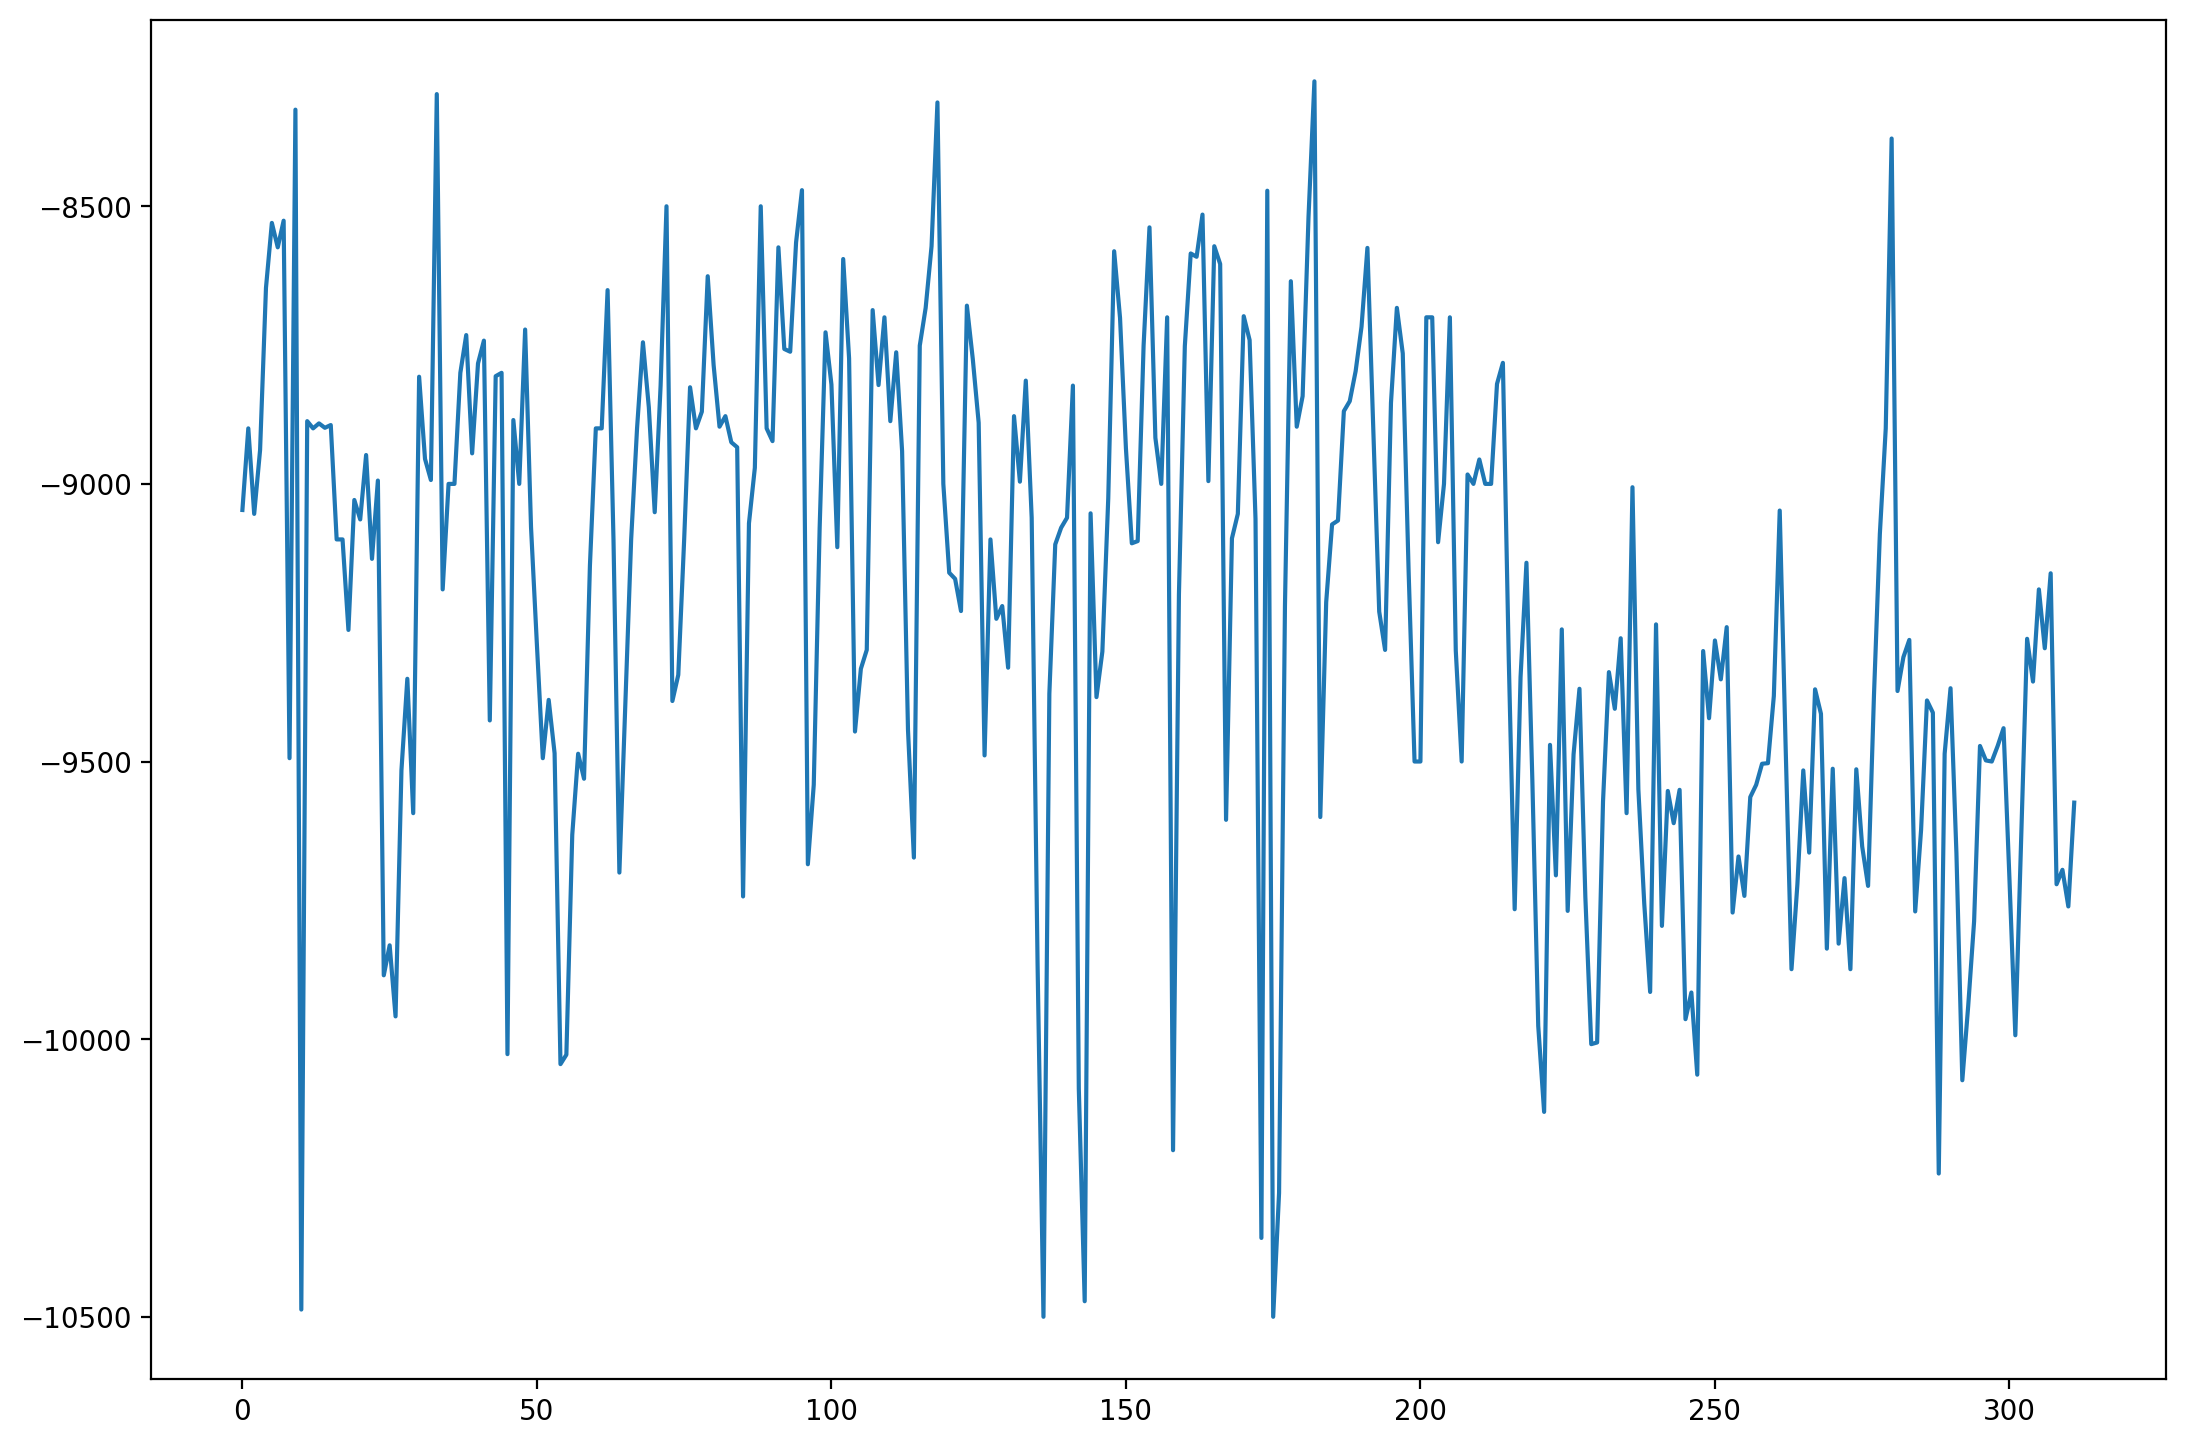

In [75]:
f = plt.figure(figsize=(13,9), dpi=200)
plt.plot(minlist2)

In [16]:
np.percentile(minlist2,99.9)

-8282.152999999998

In [17]:
np.percentile(minlist2,99.99)

-8275.7153

In [19]:
np.sum(np.array(minlist2)<-10000)

17

In [20]:
ordered = np.sort(minlist2)

In [27]:
ordered[0:5]

array([-10500, -10500, -10487, -10472, -10358], dtype=int16)

In [61]:
minpos = np.where(np.array(minlist2)<=-10300)

In [64]:
minpos

(array([ 10, 136, 143, 173, 175]),)

In [65]:
for mi in minpos[0]:
    print(da2[mi])

/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/coresPower_MFG_-40_700km2_-50points_dominant_1983_03.nc
/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/coresPower_MFG_-40_700km2_-50points_dominant_1990_04.nc
/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/coresPower_MFG_-40_700km2_-50points_dominant_1990_11.nc
/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/coresPower_MFG_-40_700km2_-50points_dominant_1995_10.nc
/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/coresPower_MFG_-40_700km2_-50points_dominant_1996_03.nc


In [31]:
da2[136]

'/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/coresPower_MFG_-40_700km2_-50points_dominant_1990_04.nc'

In [33]:
da2[175]

'/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/coresPower_MFG_-40_700km2_-50points_dominant_1996_03.nc'

In [66]:
test_day = xr.open_dataset('/media/ck/Elements/Africa/WestAfrica/cores_MFGandMSG_VERA/cores/coresPower_MFG_-40_700km2_-50points_dominant_1996_03.nc')

In [67]:
test_day

<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674, time: 1283)
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
  * time     (time) datetime64[ns] 1996-03-01T01:00:00 ... 1996-03-31T23:00:00
Data variables:
    blobs    (time, lat, lon) int16 ...
    tir      (time, lat, lon) int16 ...
Attributes:
    radii:              [3 4 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  28.0

In [68]:
islow = np.where(test_day['tir']<=-10300)

In [69]:
test_day.time[islow[0]]

<xarray.DataArray 'time' (time: 25)>
array(['1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000', '1996-03-22T01:00:00.000000000',
       '1996-03-22T01:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1996-03-22T01:00:00 ... 1996-03-22T01:00:00

/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


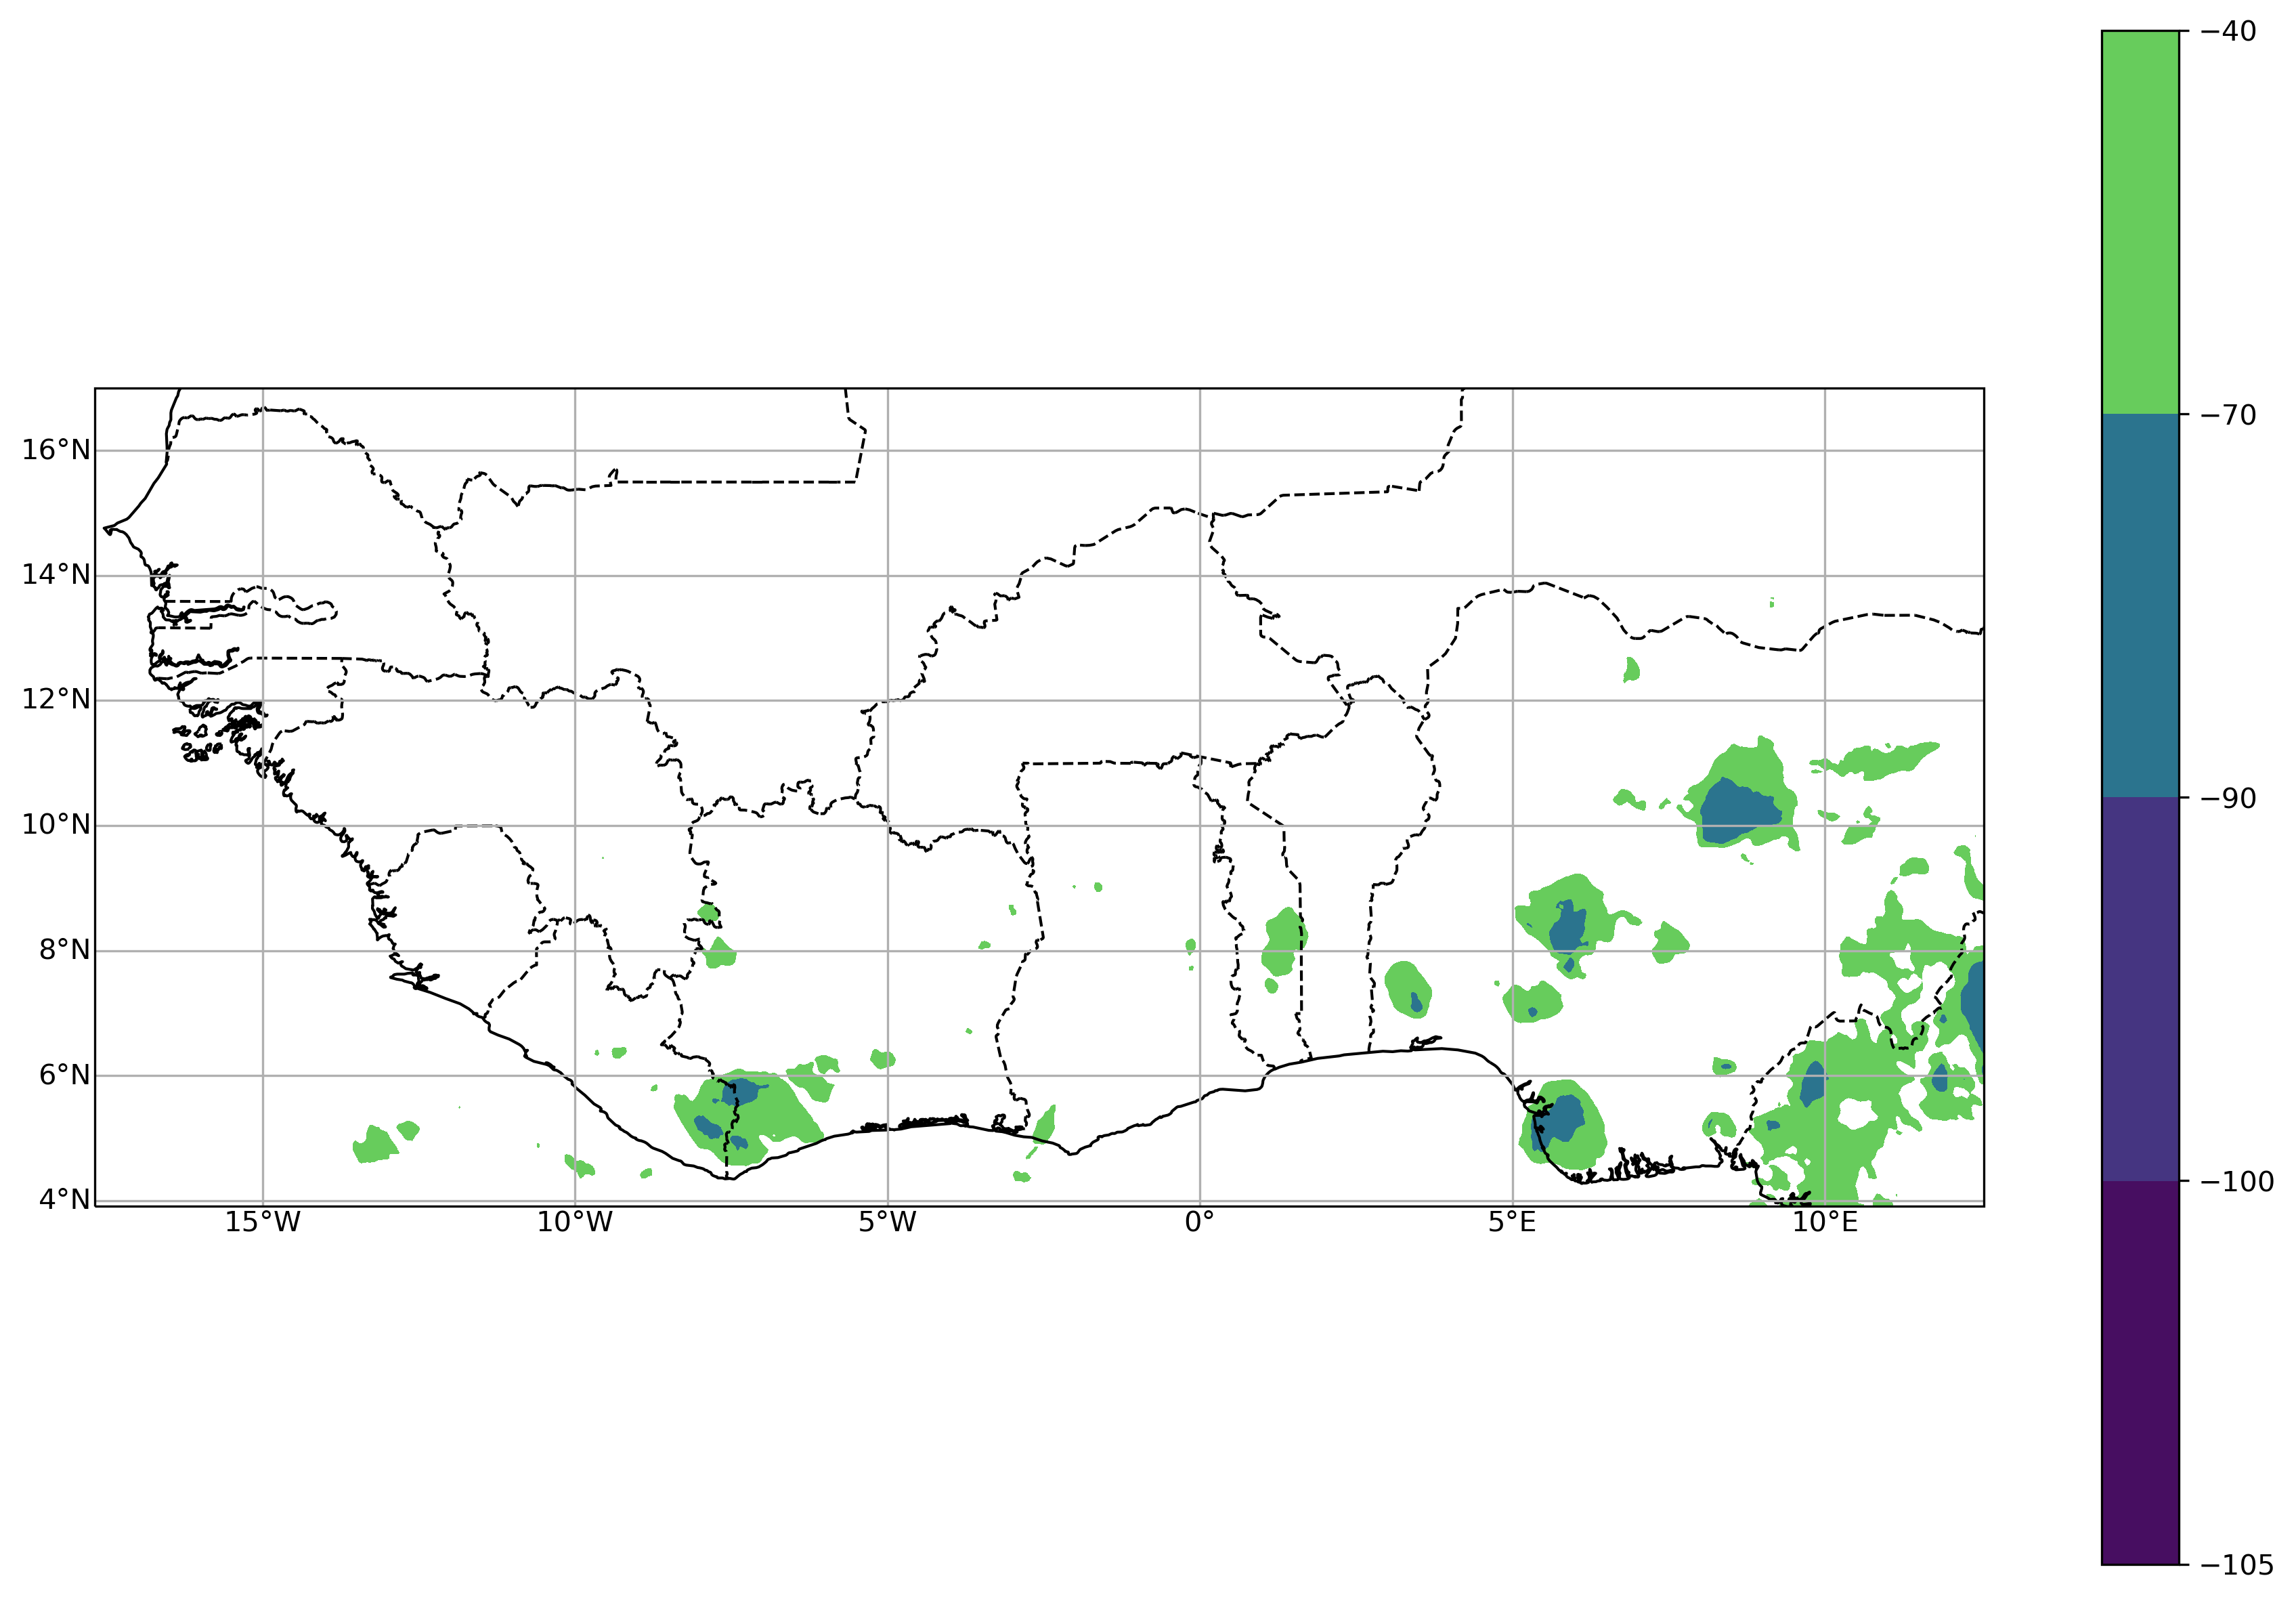

In [70]:
f=plt.figure(figsize=(15,10), dpi=300)
ax = f.add_subplot(111, projection=ccrs.PlateCarree())

plt.contourf(test_day['lon'], test_day['lat'],test_day['tir'].isel(time=498)/100, transform=ccrs.PlateCarree(), levels=[-105, -100, -90,-70,-40])
plt.colorbar()
plt.contour(test_day['lon'], test_day['lat'],test_day['tir'].isel(time=498)/100, transform=ccrs.PlateCarree(), levels=[-108, -103, -100], cmap='Greys')
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

plt.show()


In [22]:
da3 = glob.glob('/media/ck/Elements/Africa/WestAfrica/cores_bigDomain/*.nc')

In [24]:
minlist3 = []

In [25]:
for d in da3: 
    try:
        minlist3.append(xr.open_dataset(d, decode_times=False)['tir'].min())
    except:
        continue

In [26]:
np.min(minlist3)

-9937